In [121]:
import pandas as pd
import seaborn as sns


#### Importa os dados para dataframes

In [72]:
saidas = pd.read_excel('dados/vendas_abril_22.xlsx')
tipo_itens = pd.read_excel('dados/itens_por_tipo.xlsx')
tipo_acabado = tipo_itens.query('Grupo == "ACABADO"') # Cria um dataframe com apenas os itens acabados

In [74]:
saidas.head(1)

,Material,Centro,Depósito,Tipo de movimento,Estoque especial,Doc.material,Item doc.material,Data de lançamento,Qtd. UM registro,UM registro
0,202002,P703,5,601,NaN,4901691304,1,2022-04-16,-1150.0,KG


#### Cria um array com os valores únicos dos produtos

In [73]:
lista_acabado = tipo_acabado['Produto'].unique()
lista_acabado

array(['SA0092', 'SA0155', 'SE0016', 'SA0195', 'SA0215', 'IS0046',
       'IH0042', 'SZ0153', 'SA0165', 'HA0501', 'SA0168', 'SA0028',
       'PB0140', 'SA0467', 'SA0340', 'IH0043', 'HA0303', 'SA0311',
       'SA0154', 'HC0028', 'SA0164', 'SA0469', 'IH0006', 'IH0005',
       'SA0123', 'HA0281', 'HA0474', 'SA0027', 'SA0177', 'SA0036',
       'SA0083', 'SA0110', 'SA0175', 'SA0026', 'SA0357', 'HE0028',
       'SA0063', 'IH0058', 'SA0031', 'SA0347', 'SA0051', 'HA0071',
       'HA0519', 'SA0153', 'SA0025', 'SA0355', 'SA0564', 'SA0118',
       'SA0108', 'SA0273', 'SA0561', 'HC0029', 'SA0528', 'SA0065',
       'SA0033', 'SA0163', 'SA0012', 'SA0208', 'HA0668', 'SA0524',
       'SA0209', 'HA0438', 'HA0475', 'SA0278', 'SA0035', 'SA0566',
       'SA0212', 'SA0140', 'SA0166', 'HA0101', 'SA0049', 'HE0020',
       'HA0023', 'HA0740', 'HA0004', 'SA0243', 'SA0558', 'HA0025',
       'HA0069', 'SA0048', 'HA0744', 'HA0452', 'HC0015', 'SA0541',
       'SA0219', 'SA0032', 'SA0305', 'SA0348', 'SA0309', 'HC00

#### Loop 'for' para transformar todos os códigos dos produtos em maiúscula

In [111]:
nova_lista_acabado = []
for x in range(0, len(lista_acabado)):
    nova_lista_acabado.append(str(lista_acabado[x]).upper())

In [134]:
relacao_acabados = pd.DataFrame(nova_lista_acabado)
relacao_acabados.to_csv('dados/relacao_acabados.csv', sep=(','), index=False)

In [115]:
saidas['grupo'] = saidas['Material'].apply(lambda x: 'Acabado' if x in nova_lista_acabado else 'NA')

In [116]:
saidas.head(2)

,Material,Centro,Depósito,Tipo de movimento,Estoque especial,Doc.material,Item doc.material,Data de lançamento,Qtd. UM registro,UM registro,grupo
0,202002,P703,5,601,NaN,4901691304,1,2022-04-16,-1150.0,KG,NA
1,202002,P703,5,601,NaN,4901691320,10,2022-04-16,-1250.0,KG,NA


In [77]:
print('Qtd dados saidas: {}'.format(saidas.shape))
print('Qtd dados tipo_itens: {}'.format(tipo_itens.shape))

Qtd dados saidas: (28529, 11)
Qtd dados tipo_itens: (11559, 2)


#### Cria um dataframe apenas com as variáveis Material e Data de lançamento

In [119]:
saidas_acabado = saidas.query('grupo == "Acabado"')[['Material', 'Data de lançamento']]
saidas_acabado.head()

,Material,Data de lançamento
4290,HA0004,2022-04-21
4291,HA0004,2022-04-21
4292,HA0004,2022-04-21
4293,HA0004,2022-04-21
4294,HA0004,2022-04-06


#### Cria um gráfico dos itens mais expedidos no mês

In [122]:
saidas_acabado_item = saidas_acabado['Material'].value_counts().to_frame().reset_index()

In [123]:
saidas_acabado_item.head(2)

,index,Material
0,SA0309,1469
1,SA0579,418


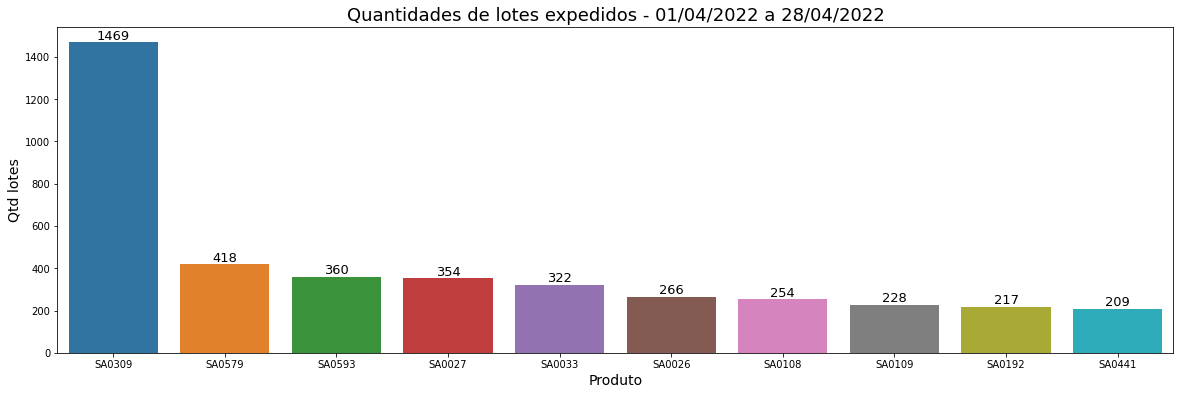

In [144]:
ax = sns.barplot(x='index', y='Material', data=saidas_acabado_item.head(10))
ax.set_title('Quantidades de lotes expedidos - 01/04/2022 a 28/04/2022', fontsize=18)
ax.figure.set_size_inches(20,6)
ax.bar_label(ax.containers[0], size=13)
ax.set_ylabel('Qtd lotes', fontsize=14)
ax.set_xlabel('Produto', fontsize=14)
ax=ax